In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("output/ipl_ball_by_ball_output.csv")

In [3]:
df.shape

(260759, 18)

In [4]:
df.head(12)

,date,match_number,innings,over,batter,bowler,non_striker,runs.batter,runs.extras,runs.total,extras.legbyes,extras.wides,extras.byes,extras.noballs,wicket.kind,wicket.player_out,wicket.fielders,wickets
0,2008-04-18,1,1,0,SC Ganguly,P Kumar,BB McCullum,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,1,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2008-04-18,1,1,0,BB McCullum,P Kumar,SC Ganguly,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2008-04-18,1,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008-04-18,1,1,1,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-04-18,1,1,1,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_grouby_over = df.groupby(["date", "match_number", "innings", "over"])['runs.total'].agg("sum")

In [6]:
df_grouby_over.head(20)

date        match_number  innings  over
2008-04-18  1             1        0        3
                                   1       18
                                   2        6
                                   3       23
                                   4       10
                                   5        1
                                   6        7
                                   7        5
                                   8        4
                                   9       10
                                   10      15
                                   11      10
                                   12      12
                                   13       6
                                   14      24
                                   15       4
                                   16      14
                                   17       7
                                   18      21
                                   19      22
Name: runs.total, dtype: int64

In [7]:
df_grouby_over = df_grouby_over.reset_index()

In [8]:
df_grouby_over

,date,match_number,innings,over,runs.total
0,2008-04-18,1,1,0,3
1,2008-04-18,1,1,1,18
2,2008-04-18,1,1,2,6
3,2008-04-18,1,1,3,23
4,2008-04-18,1,1,4,10
...,...,...,...,...,...
42175,2024-05-26,Final,2,6,12
42176,2024-05-26,Final,2,7,9
42177,2024-05-26,Final,2,8,13
42178,2024-05-26,Final,2,9,5


In [9]:
df_first = df_grouby_over.head(20)

In [10]:
df_first

,date,match_number,innings,over,runs.total
0,2008-04-18,1,1,0,3
1,2008-04-18,1,1,1,18
2,2008-04-18,1,1,2,6
3,2008-04-18,1,1,3,23
4,2008-04-18,1,1,4,10
5,2008-04-18,1,1,5,1
6,2008-04-18,1,1,6,7
7,2008-04-18,1,1,7,5
8,2008-04-18,1,1,8,4
9,2008-04-18,1,1,9,10


<BarContainer object of 20 artists>

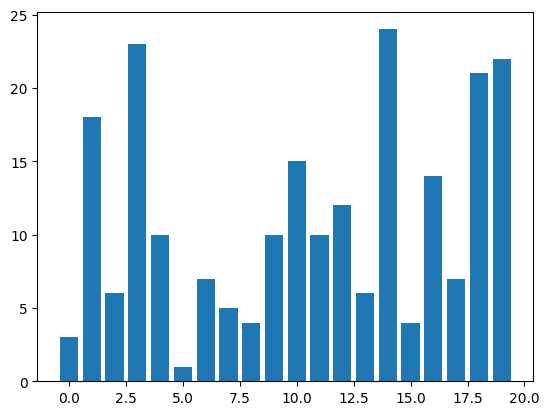

In [11]:
plt.bar(data=df_first, x="over", height="runs.total")

Text(0.5, 1.0, 'Runs by Over')

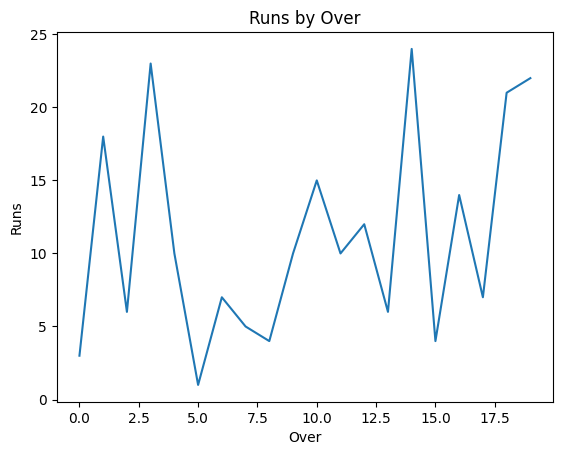

In [12]:
plt.plot(df_first["over"], df_first["runs.total"])
plt.xlabel("Over")
plt.ylabel("Runs")
plt.title("Runs by Over")

In [13]:
df_first["cum_runs"] = df_first['runs.total'].cumsum(axis=0)


/tmp/ipykernel_93902/1997964566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first["cum_runs"] = df_first['runs.total'].cumsum(axis=0)


In [14]:
df_first

,date,match_number,innings,over,runs.total,cum_runs
0,2008-04-18,1,1,0,3,3
1,2008-04-18,1,1,1,18,21
2,2008-04-18,1,1,2,6,27
3,2008-04-18,1,1,3,23,50
4,2008-04-18,1,1,4,10,60
5,2008-04-18,1,1,5,1,61
6,2008-04-18,1,1,6,7,68
7,2008-04-18,1,1,7,5,73
8,2008-04-18,1,1,8,4,77
9,2008-04-18,1,1,9,10,87


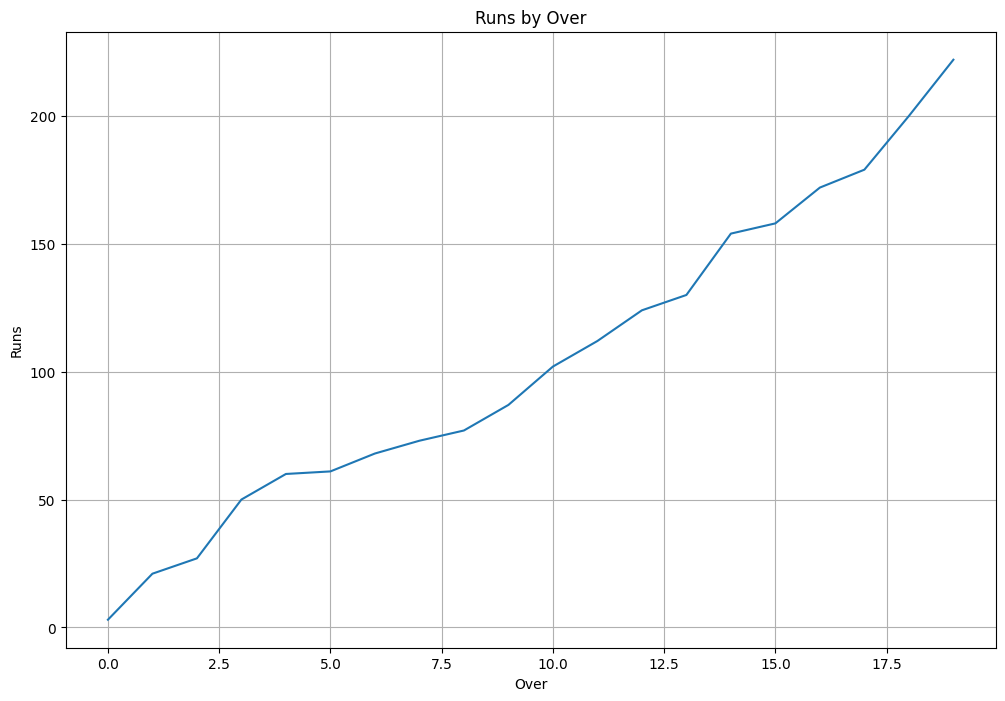

In [17]:
plt.figure(figsize=(12,8))
plt.plot(df_first["over"], df_first["cum_runs"])
plt.xlabel("Over")
plt.ylabel("Runs")
plt.title("Runs by Over")
plt.grid(True)